# 第7章 支持向量机
<b>求解目的</b>：  
支持向量机的本质并不复杂，其实质仍然是在求解一个线性分割面，这个分割面由参数$w$确定，但是对于这个分割面，我们增加了一些限制和约束，约束围绕“最大间隔距离”这个概念展开，为什么需要加这个约束呢？因为，当我们拿到一组二分类问题的数据时，能够区分开不同类数据的分割面不止一个，如何确定一个最好的分割面就成了需要进一步确定的问题，SVM以及最大间隔距离概念的出现，使求解最佳分割面的问题成为可能。  

## 7.1 线性可分支持向量机
### 7.1.1 对线性分割面的理解
>给定数据$T=\{(x_1,y_1),(x_2,y_2),...,(x_N,y_N)\}$，我们期望得到参数$w^*$和$b^*$，$w^*$和$b^*$可以对$x$进行函数映射，此时得到一个分割超平面，即$$w^* x + b^* = 0$$
然后，决策函数被定义为：
$$f(x) = sign(w^*x + b^*)$$
但是这里，我们考虑以下一种情况：当给定以下数据及其类别标签

In [1]:
import numpy as np
x = np.array([[3,4],[1,1],[4,3],[1,0],[2,1],[4,2],[4,0]])
y = np.array([1,-1,1,-1,-1,1,1]).T

>并将之绘制在二维空间时，会得到以下图像：

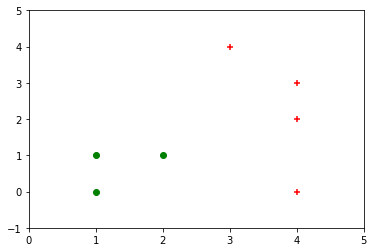

In [3]:
import matplotlib.pyplot as plt
posindex = x[y[:] == 1]
negindex = x[y[:] == -1]
plt.scatter(posindex[:,0], posindex[:,1], c='red', alpha=1, marker='+', label='pickup') 
plt.scatter(negindex[:,0], negindex[:,1], c='green', alpha=1, marker='o', label='pickup') 
plt.axis([0,5,-1,5])
plt.show()

>给定以下三组参数方程，绘制分割曲线来区分数据
* f1 =  -5.00 + 1.81 * x_ +  0.55 * y_
* f2 =  -5.30 + 1.61 * x_ +  0.95 * y_
* f3 =  -6.00 + 1.91 * x_ +  0.55 * y_

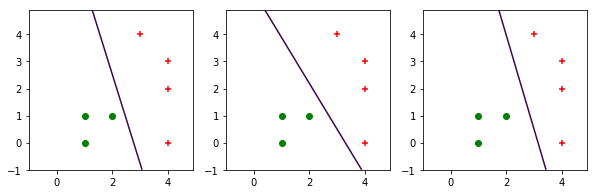

In [4]:
import matplotlib.pyplot as plt
x_ = np.arange(-1,5,0.1)
y_ = np.arange(-1,5,0.1)
x_, y_ = np.meshgrid(x_, y_)
plt.figure(figsize=(10, 10)) 
plt.subplot(3,3,1)
plt.scatter(posindex[:,0], posindex[:,1], c='red', alpha=1, marker='+', label='pickup') 
plt.scatter(negindex[:,0], negindex[:,1], c='green', alpha=1, marker='o', label='pickup') 
f =  -5.00 + 1.81 * x_ +  0.55 * y_
plt.contour(x_, y_, f,0)
plt.subplot(3,3,2)
plt.scatter(posindex[:,0], posindex[:,1], c='red', alpha=1, marker='+', label='pickup') 
plt.scatter(negindex[:,0], negindex[:,1], c='green', alpha=1, marker='o', label='pickup') 
f =  -5.30 + 1.61 * x_ +  0.95 * y_
plt.contour(x_, y_, f,0)
plt.subplot(3,3,3)
plt.scatter(posindex[:,0], posindex[:,1], c='red', alpha=1, marker='+', label='pickup') 
plt.scatter(negindex[:,0], negindex[:,1], c='green', alpha=1, marker='o', label='pickup') 
f =  -6.00 + 1.91 * x_ +  0.55 * y_
plt.contour(x_, y_, f,0)
plt.show()

可以发现不同的参数方程都可以确定一个分割方程来区分数据，但是无法确定最好的分割函数为哪一个。

### 7.1.2 于是，SVM出现了！关于SVM的推导
两个基本概念
><b>函数间隔</b>
>>首先，当给出参数方程$(w,b)$的时候，任意样本点$x_i$到分割面的<b>函数间隔</b>被定义为$$\hat \gamma_i = y_i(wx_i+b)$$
其中，$y_i \in \{1,-1\}$  
对整个训练数据集$T$而言，我们的目的是找到最小的$\hat \gamma $，即$$\hat \gamma = \mathop \min_{i=1,...,N} \hat \gamma_i$$
所以这里可以一定程度上知晓，$T$数据中一定存在起决定性作用的样本$x_i$，其可以使$\hat \gamma $的值尽可能得小。  

><b>几何间隔</b>  
>>某个点到分割面的距离为
$$\gamma_i = \frac{w}{||w||}x_i + \frac{b}{||w||}$$
因为$y_i \in \{1,-1\}$，所以，若点$x_i$被正确分类，则有点到分割面的距离为$$\gamma_i = y_i (\frac{w}{||w||}x_i + \frac{b}{||w||})$$

为了更直观了解何为“几何间隔”，这里定性地绘制两幅图，左边的图中，几何间隔较大，右边的图，集合间隔较小。

fig1. 点(2,1)到分割面几何间隔 γ1 =  0.8703913642249845

fig2. 点(2,1)到分割面几何间隔 γ2 =  0.6044768974731611


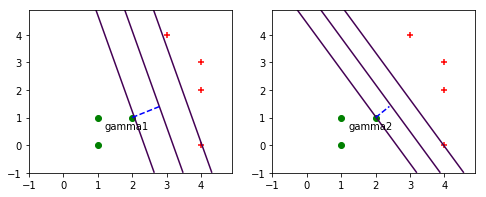

In [5]:
## 注：以下示意图仅为定性示意使用，非定量分析
x_ = np.arange(-1,5,0.1)
y_ = np.arange(-1,5,0.1)
x_, y_ = np.meshgrid(x_, y_)
plt.figure(figsize=(8, 3)) 

plt.subplot(1,2,1)
plt.scatter(posindex[:,0], posindex[:,1], c='red', alpha=1, marker='+', label='pickup') 
plt.scatter(negindex[:,0], negindex[:,1], c='green', alpha=1, marker='o', label='pickup') 
f =  -4.50 + 1.91 * x_ +  0.55 * y_
f_1 =  -6.10 + 1.91 * x_ +  0.55 * y_
f_2 =  -7.70 + 1.91 * x_ +  0.55 * y_
plt.contour(x_, y_, f,0)
plt.contour(x_, y_, f_1,0)
plt.contour(x_, y_, f_2,0)
plt.plot([2,2.8],[1,1.4],'b--')
plt.text(1.2, 0.6,'gamma1')
print 'fig1. 点(2,1)到分割面几何间隔 γ1 = ', -1*(1.91*2+0.55*1 - 6.10)/np.sqrt(1.91**2 + 0.55**2)

plt.subplot(1,2,2)
plt.scatter(posindex[:,0], posindex[:,1], c='red', alpha=1, marker='+', label='pickup') 
plt.scatter(negindex[:,0], negindex[:,1], c='green', alpha=1, marker='o', label='pickup') 
f =  -4.20 + 1.61 * x_ +  0.95 * y_
f_1 =  -5.30 + 1.61 * x_ +  0.95 * y_
f_2 =  -6.40 + 1.61 * x_ +  0.95 * y_
plt.contour(x_, y_, f,0)
plt.contour(x_, y_, f_1,0)
plt.contour(x_, y_, f_2,0)
plt.text(1.2, 0.6,'gamma2')
plt.plot([2,2.4],[1,1.4],'b--') #在点到x轴画出垂直线
print '\nfig2. 点(2,1)到分割面几何间隔 γ2 = ', -1*(1.61*2+0.95*1 - 5.30)/np.sqrt(1.61**2 + 0.95**2)

><b>间隔最大化</b>   
虽然对数据进行线性分割的时候，可以得到无穷多个分割面方程，但是，几何间隔最大的时候的分割面只有一个（这里暂时不讨论“软间隔”问题）,实际上，通过上述的图像可以发现，几何间隔越大，分割面越好，因为数据点离分割面越远，置信度越高。所以这里我们定义如下式子来描述我们接下来的目的，即
$$\mathop \max_{w,b} \gamma$$
但是这个写法是有条件的，因为我们是打算最大化的是最靠近分割面的点到分割面之间的距离，所以附加条件约束为
$$s.t. y_i (\frac{w}{||w||}x_i + \frac{b}{w}) \geq \gamma$$
这个条件，隐性地要求超平面$(w,b)$关于每个训练样本点的几何间隔至少为$\gamma$  
又因为  
$$几何间隔\gamma = \frac{由T中某个样本x_i确定的函数间隔最小值\hat \gamma}{||w||}$$
所以有
$$\mathop \max_{w,b} \gamma = \mathop \max_{w,b} \frac{\hat \gamma}{||w||}$$
$$s.t. y_i (wx_i + b) \geq \hat \gamma$$
由于${\hat \gamma}$ 对求解 $\mathop \max_{w,b} \gamma$ 无用，因此
$$\mathop \max_{w,b} \frac{\hat \gamma}{||w||} 等价于 \mathop \max_{w,b} \frac{1}{||w||}$$
该式子进一步的推导可知
$$\mathop \max_{w,b} \frac{1}{||w||} 等价于 \mathop \min_{w,b} \frac{||w||^2}{2} $$
因此得到最终优化问题：  
$$\mathop \min_{w,b} \frac{||w||^2}{2} $$
此时条件$y_i (wx_i + b) - \hat\gamma\geq 0 $
等价于
$$s.t. y_i (wx_i + b) - 1 \geq 0 $$
当解出相应的$w$和$b$之后，可以直接构造预测函数，即：
$$f(x) = sign(wx+b)$$

---
## 7.2 编写代码测试示例数据

In [6]:
# 确定w的维度dim
n,dim = x.shape
print 'w includs',dim,'parameters'

w includs 2 parameters


>$w$包含了两个参数，这里定义两个参数$w1$和$w2$  
此时我们要最小化目标函数为
$$\mathop \min_{w,b} \frac{||w||^2}{2} = \mathop \min_{w,b} \frac{w_1^2+w_2^2}{2}$$
$$s.t. y_i (w x_i + b) - 1 \geq 0, 其中(x_i,y_i) \in T$$
约束条件为

In [7]:
print '约束条件：'
for i in range(len(x)):
    if y[i] == 1:
        print ' ',y[i],'*(',x[i,0],'* w1 +',x[i,1],'* w2 + b )≥ 1'
    if y[i] == -1:
        print ' ',y[i],'*(',x[i,0],'* w1 +',x[i,1],'* w2 + b )≥ 1'

约束条件：
  1 *( 3 * w1 + 4 * w2 + b )≥ 1
  -1 *( 1 * w1 + 1 * w2 + b )≥ 1
  1 *( 4 * w1 + 3 * w2 + b )≥ 1
  -1 *( 1 * w1 + 0 * w2 + b )≥ 1
  -1 *( 2 * w1 + 1 * w2 + b )≥ 1
  1 *( 4 * w1 + 2 * w2 + b )≥ 1
  1 *( 4 * w1 + 0 * w2 + b )≥ 1


此时，问题已经转化为求解一个条件极值问题。一般来说，直接使用拉格朗日乘子法，构造一个多元函数，最后解出这个线性方程组，就可以直接得到最终的参数，其中，拉格朗日函数记为
$$L(w,b,\lambda) = \frac{||w||^2}{2} + \sum_{i=1}^N \lambda_i y_i (wx_i+ b -1)$$
然后，拉格朗日函数对其参数w和b求偏导，并令其等于$0$，有：
$$\nabla_w L(w,b,\lambda) = w + \sum_{i=1}^N \lambda_i x_i y_i = 0$$
$$\nabla_b L(w,b,\lambda) = \sum_{i=1}^{N} \lambda_i y_i = 0$$

---
## 7.3 核函数
核函数是为了SVM中的解决线性不可分的问题，一个经典的图如下所示，在没有进行核函数映射之前，数据呈现为两个包围状的数据分布，无法求解得到一个线性分割面对数据进行分割；进行核函数映射之后，数据分布可以被一个线性分割面分割。  
![svm_kernel](./img/svm_kernel.gif)